In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pizza-place-sales/pizza_types.csv
/kaggle/input/pizza-place-sales/orders.csv
/kaggle/input/pizza-place-sales/order_details.csv
/kaggle/input/pizza-place-sales/pizzas.csv


In [2]:
df=pd.read_csv("/kaggle/input/pizza-place-sales/order_details.csv")


In [3]:
df

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [4]:
df2=pd.read_csv("/kaggle/input/pizza-place-sales/orders.csv")
df3=pd.read_csv("/kaggle/input/pizza-place-sales/pizza_types.csv",encoding='iso-8859-1')
df4=pd.read_csv("/kaggle/input/pizza-place-sales/pizzas.csv")

In [5]:
final=pd.merge(df,df2,on="order_id",how="inner")


In [6]:
final=pd.merge(final,df4,on="pizza_id",how="inner")

In [7]:
final=pd.merge(final,df3,on="pizza_type_id",how="inner")

In [8]:
final

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [9]:
final.to_csv("pizza place sales.csv")

In [10]:
 final.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [11]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [12]:
final.isna().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [13]:
final.describe()

,order_details_id,order_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132
std,14035.529381,6180.119770,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000
max,48620.000000,21350.000000,4.000000,35.950000


In [14]:
final.order_details_id.duplicated().sum()

0

####  **1. How many customers do we have each day? Are there any peak hours?**

In [15]:
 
final['time'] = pd.to_datetime(final['time'])
final['hour'] = final['time'].dt.hour
final

/tmp/ipykernel_19/2955030555.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final['time'] = pd.to_datetime(final['time'])


,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,hour
0,1,1,hawaiian_m,1,2015-01-01,2024-02-17 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",11
1,2,2,classic_dlx_m,1,2015-01-01,2024-02-17 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",11
2,3,2,five_cheese_l,1,2015-01-01,2024-02-17 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",11
3,4,2,ital_supr_l,1,2015-01-01,2024-02-17 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",11
4,5,2,mexicana_m,1,2015-01-01,2024-02-17 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,2024-02-17 21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",21
48616,48617,21348,four_cheese_l,1,2015-12-31,2024-02-17 21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",21
48617,48618,21348,napolitana_s,1,2015-12-31,2024-02-17 21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",21
48618,48619,21349,mexicana_l,1,2015-12-31,2024-02-17 22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",22


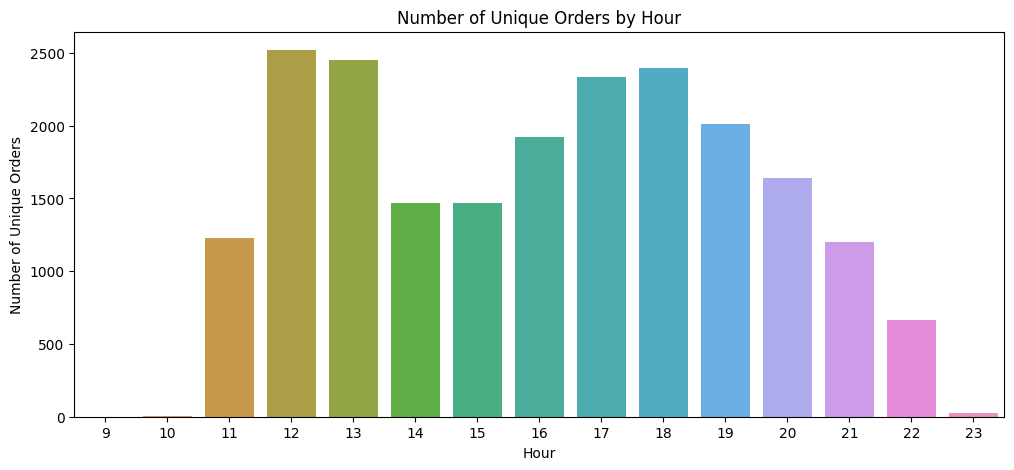

In [16]:
hour= final.groupby(["hour"])["order_id"].nunique().reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(x='hour', y='order_id', data=hour)
plt.title('Number of Unique Orders by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Unique Orders')
plt.show()

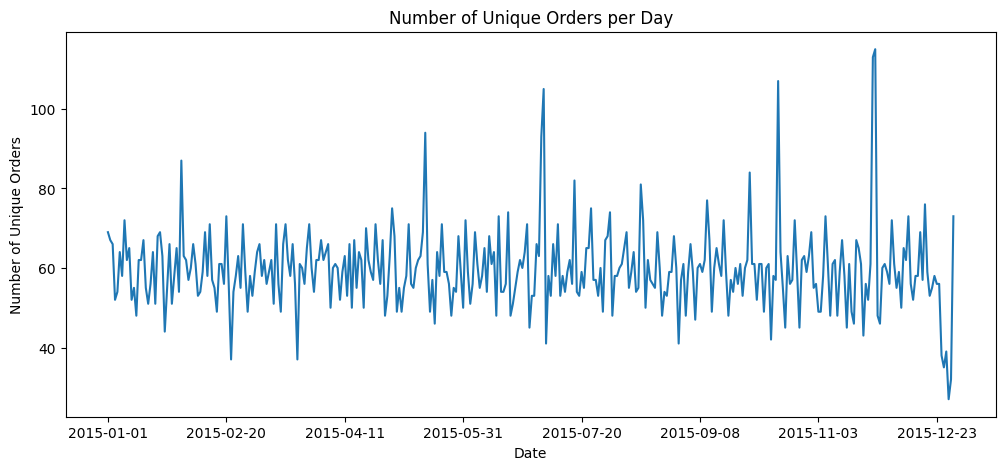

In [17]:
day=final.groupby(["date"])["order_id"].nunique()
plt.figure(figsize=(12, 5))
day.plot()
plt.title('Number of Unique Orders per Day')
plt.xlabel('Date')
plt.ylabel('Number of Unique Orders')
plt.show()


In [18]:
mean=final.groupby(["date"])["order_id"].nunique().mean().round()
mean

60.0

#### **2.How many pizzas are typically in order? Do we have any bestsellers?**

In [19]:
order=final.groupby(["order_id"])["quantity"].value_counts().mean()
order

2.2036894348003444

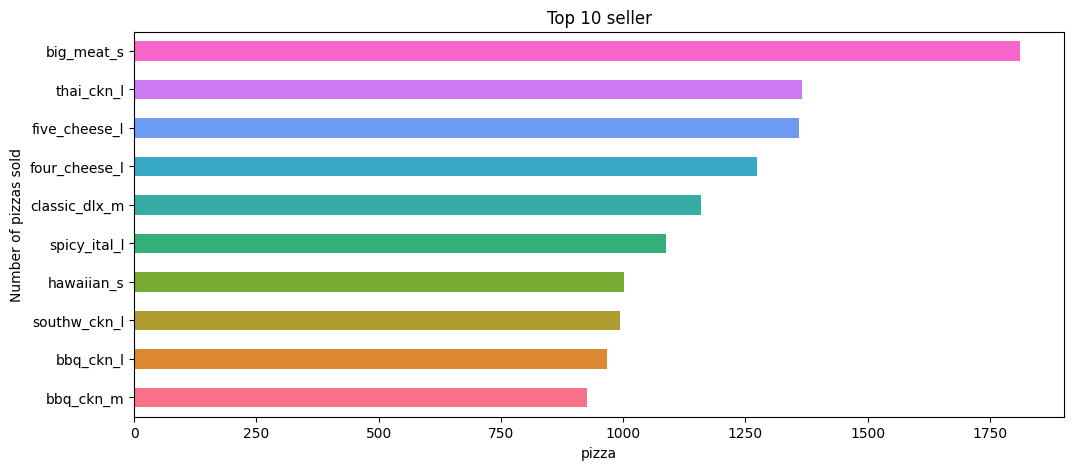

pizza_id
bbq_ckn_m         926
bbq_ckn_l         967
southw_ckn_l      993
hawaiian_s       1001
spicy_ital_l     1088
classic_dlx_m    1159
four_cheese_l    1273
five_cheese_l    1359
thai_ckn_l       1365
big_meat_s       1811
Name: count, dtype: int64

In [20]:
seller=final.pizza_id.value_counts().head(10).sort_values(ascending=True)
plt.figure(figsize=(12, 5))
colors = sns.color_palette('husl', 10)
seller.plot(kind="barh",color=colors)
plt.title('Top 10 seller')
plt.xlabel('pizza')
plt.ylabel('Number of pizzas sold')
plt.show()
seller

#### **3.How much money did we make this year? Can we identify any seasonality in the sales?**

In [21]:
final['date'] = pd.to_datetime(final['date'])
final['month_name'] = final['date'].dt.strftime('%B')

 

In [22]:
season_mapping = {'January': 'Winter','February': 'Winter','March': 'Spring', 'April': 'Spring', 'May': 'Spring', 'June': 'Summer', 'July': 'Summer', 'August': 'Summer','September': 'Fall','October': 'Fall','November': 'Fall','December': 'Winter'}
final['season'] = final['month_name'].map(season_mapping)

In [23]:
money=final.price.sum()
money

801944.7000000001

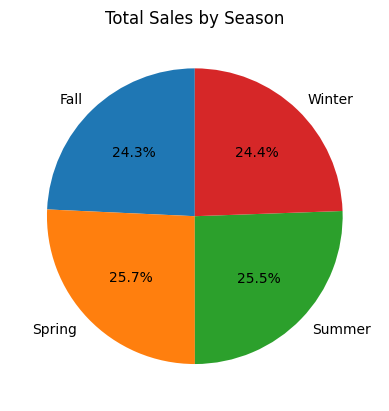

season
Fall      194638.50
Spring    206423.55
Summer    204892.55
Winter    195990.10
Name: price, dtype: float64

In [24]:
sesion=final.groupby(["season"])["price"].sum()
sesion.plot(kind="pie",x="sesion",autopct='%1.1f%%', startangle=90)
plt.title("Total Sales by Season")
plt.ylabel("")
plt.show()
sesion

### **3.Are there any pizzas we should take off the menu, or any promotions we could leverage?**

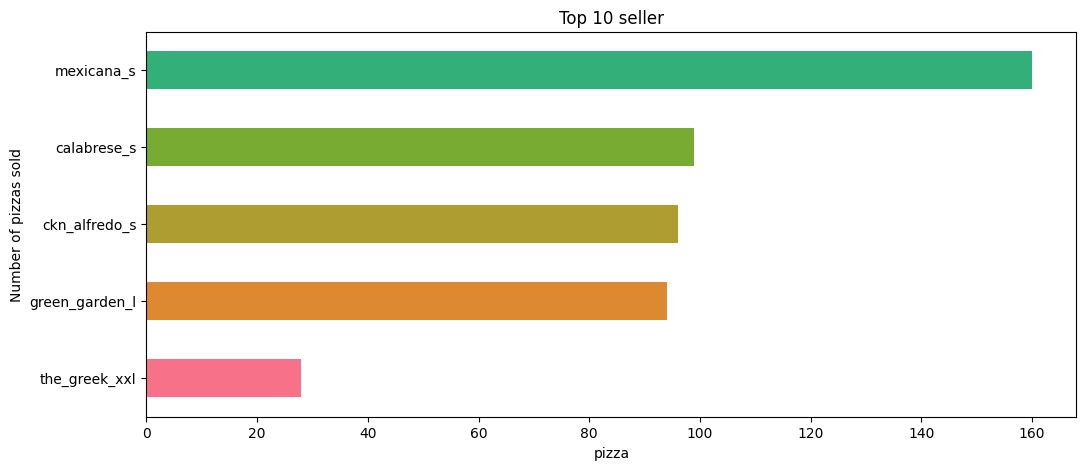

pizza_id
the_greek_xxl      28
green_garden_l     94
ckn_alfredo_s      96
calabrese_s        99
mexicana_s        160
Name: count, dtype: int64

In [25]:
seller1=final.pizza_id.value_counts().tail(5).sort_values(ascending=True)
plt.figure(figsize=(12, 5))
colors = sns.color_palette('husl', 10)
seller1.plot(kind="barh",color=colors)
plt.title('Top 10 seller')
plt.xlabel('pizza')
plt.ylabel('Number of pizzas sold')
plt.show()
seller1

**..............................................................................................................................................................................................................................................................**

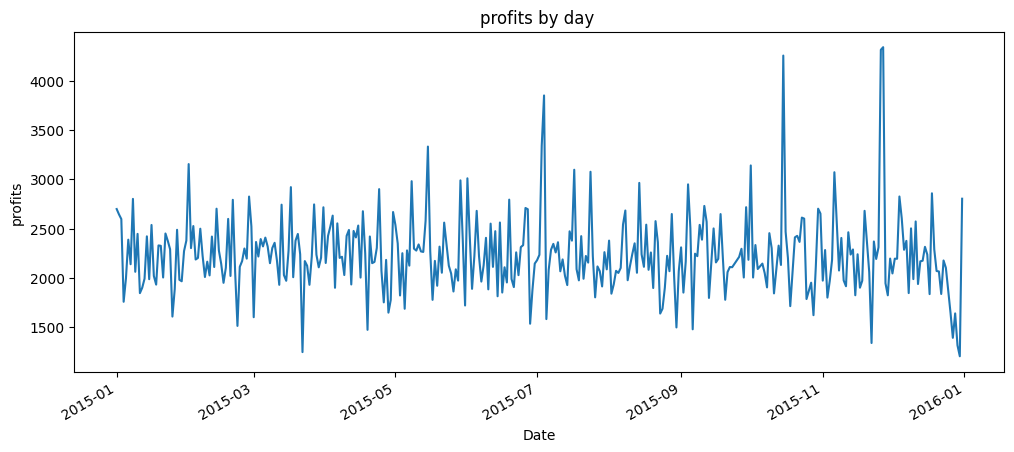

In [26]:
day1=final.groupby(["date"])["price"].sum()
plt.figure(figsize=(12, 5))
day1.plot()
plt.title('profits by day ')
plt.xlabel('Date')
plt.ylabel('profits')
plt.show()


In [27]:
 monthly_sum = final.groupby("month_name")["price"].sum().reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(x='month', y='price', data=final, marker='o')
plt.title('Profits by Month')
plt.xlabel('Month')
plt.ylabel('Profits')
plt.show()

ValueError: Could not interpret value `month` for parameter `x`

<Figure size 1200x500 with 0 Axes>

In [ ]:
final